# Kernal trick i SVM (support vector machine

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from matplotlib.colors import ListedColormap


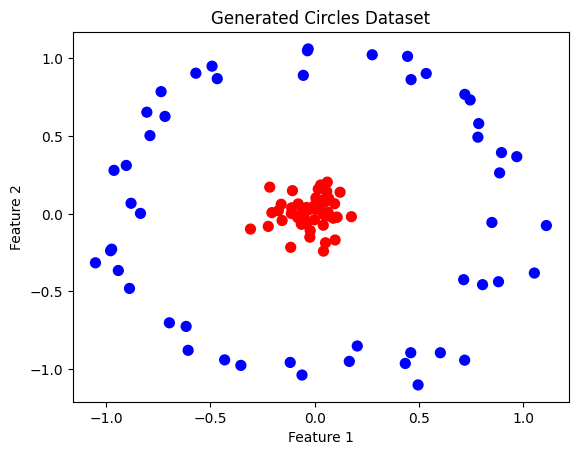

In [4]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate circular data
X, y = make_circles(n_samples=100, factor=0.1, noise=0.1)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Circles Dataset")
plt.show()


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20)

In [6]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.45

In [18]:
# Plot the plane
# Function to plot 3D transformation
def plot_3d_plot(X, y):
    # Nonlinear transformation: r = exp(-||X||²)
    r = np.exp(-(X ** 2).sum(1))
    
    # Create 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter plot
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr', edgecolor='k')
    
    # Customize view
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3 = exp(-||X||²)")
    ax.set_title("3D Projection of make_circles Data")
    
    plt.show()



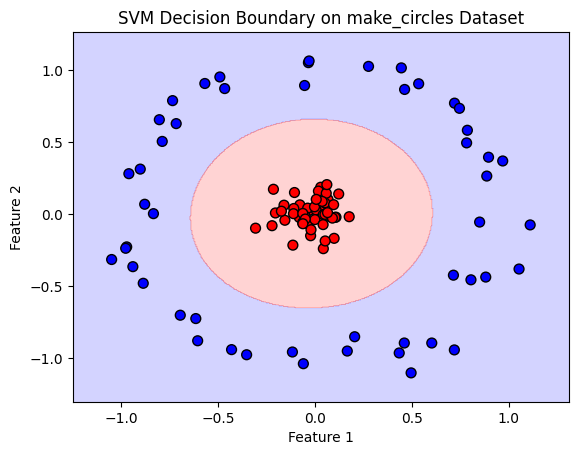

In [9]:
# Step 2: Train an SVM classifier (RBF kernel)
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X, y)


# Step 3: Create a mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Step 4: Predict for each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot decision boundary and data points
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr', edgecolors='k')
plt.title("SVM Decision Boundary on make_circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [16]:
# Plot the plane
def plot_3d_plot(X,y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:,1], r, c=y, s=100, cmap='bwr')
   
# Step 6: Customize view
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3 = x1² + x2²")
ax.set_title("3D Decision Boundary (SVM on make_circles)")

plt.show()




# RBL

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        52

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



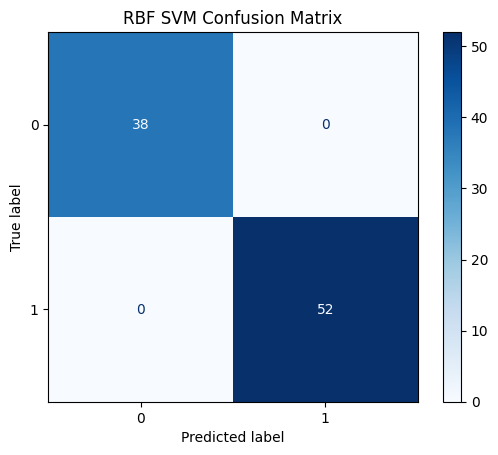

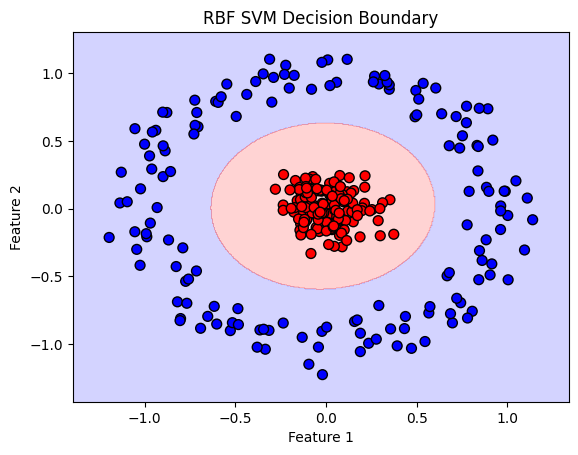

In [19]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Step 1: Create data
X, y = make_circles(n_samples=300, factor=0.1, noise=0.1, random_state=42)

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train RBF SVM
rbf_classifier = SVC(kernel="rbf", gamma="auto")
rbf_classifier.fit(X_train, y_train)

# Step 4: Predict on test set
y_pred = rbf_classifier.predict(X_test)

# Step 5: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("RBF SVM Confusion Matrix")
plt.show()

# Step 7: (Optional) Plot decision boundary
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = rbf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=50)
plt.title("RBF SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
